In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import os
from   scipy import stats

In [3]:
df_Churn_Modelling_archivo = pd.read_csv('Churn_Modelling.csv')

In [4]:
df_Churn_Modelling_archivo.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df_Churn_Modelling_archivo.shape

(10000, 14)

In [6]:
#Algunas algunas estadísticas descriptivas sobre el DataFrame para facilitar la lectura de los datos
df_Churn_Modelling_archivo.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(0, 0.5, 'EstimatedSalary')

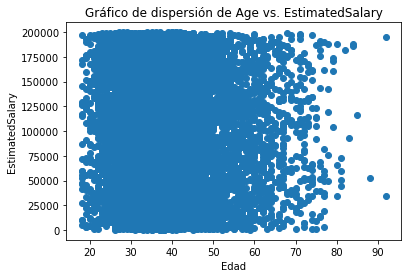

In [15]:
plt.scatter(df_Churn_Modelling_archivo['Age'], df_Churn_Modelling_archivo['EstimatedSalary'])
plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')
plt.xlabel('Edad')
plt.ylabel('EstimatedSalary')

#Comienzo el análisis tratando de relacionar Edad Vs Salario ( plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')  
#con un gráfico con dispersión de cual no puedo sacar muchas conclusiones, 
#salvo que se concentran los salarios estimados entre  la edad de 20  hasta los 60 como ocurre en varios países.

Text(0, 0.5, 'EstimatedSalary')

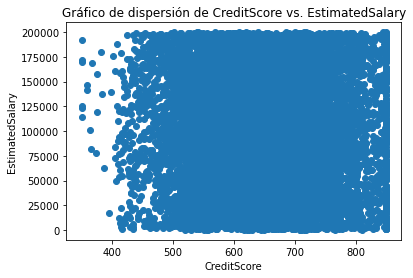

In [4]:
plt.scatter(df_Churn_Modelling_archivo['CreditScore'], df_Churn_Modelling_archivo['EstimatedSalary'])
plt.title('Gráfico de dispersión de CreditScore vs. EstimatedSalary')
plt.xlabel('CreditScore')
plt.ylabel('EstimatedSalary')

#Sigo  el análisis tratando de relacionar Score Vs Salario ( plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')  
#y como esperaba puedo decir a mayor score mayor salario o viceversa. De todas maneras, no veo clara la info.

In [5]:
df_Churn_Modelling_archivo['Age'].value_counts()
#ahora cuento las edades, veo que hay personas mayores de 80, pero son pocas.

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [53]:
#Decido filtrar por rangos a partir de los resultados del gráfico de dispersión en este caso entre 20 a 59 que concentra la mayor
#cantidad como se vio en el de dispersión edad vs score
edades_rango = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 20) & (df_Churn_Modelling_archivo['Age'] <= 59)]

conteo_edades_rango = edades_rango['Age'].value_counts().reset_index()
conteo_edades_rango.columns = ['Edad', 'Cantidad']

#Imprimir
print(conteo_edades_rango)



    Edad  Cantidad
0     37       478
1     38       477
2     35       474
3     36       456
4     34       447
5     33       442
6     40       432
7     39       423
8     32       418
9     31       404
10    41       366
11    29       348
12    30       327
13    42       321
14    43       297
15    28       273
16    44       257
17    45       229
18    46       226
19    27       209
20    26       200
21    47       175
22    48       168
23    25       154
24    49       147
25    50       134
26    24       132
27    51       119
28    52       102
29    23        99
30    54        84
31    22        84
32    55        82
33    57        75
34    53        74
35    56        70
36    58        67
37    59        62
38    21        53
39    20        40


In [6]:
#Filtro por rango de solo los 30s ya que seguía siendo mucha info
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 30) & (df_Churn_Modelling_archivo['Age'] <= 39)]
print(Age_df_30)

      RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
3             4    15701354         Boni          699    France  Female   39   
10           11    15767821       Bearce          528    France    Male   31   
12           13    15632264          Kay          476    France  Female   34   
14           15    15600882        Scott          635     Spain  Female   35   
21           22    15597945     Dellucci          636     Spain  Female   32   
...         ...         ...          ...          ...       ...     ...  ...   
9990       9991    15798964   Nkemakonam          714   Germany    Male   33   
9992       9993    15657105  Chukwualuka          726     Spain    Male   36   
9995       9996    15606229     Obijiaku          771    France    Male   39   
9996       9997    15569892    Johnstone          516    France    Male   35   
9997       9998    15584532          Liu          709    France  Female   36   

      Tenure    Balance  NumOfProducts 

In [7]:
#Filtro por rango de solo los 40s
Age_df_40 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 40) & (df_Churn_Modelling_archivo['Age'] <= 49)]

conteo = Age_df_40['Age'].value_counts()

print(conteo)

40    432
41    366
42    321
43    297
44    257
45    229
46    226
47    175
48    168
49    147
Name: Age, dtype: int64


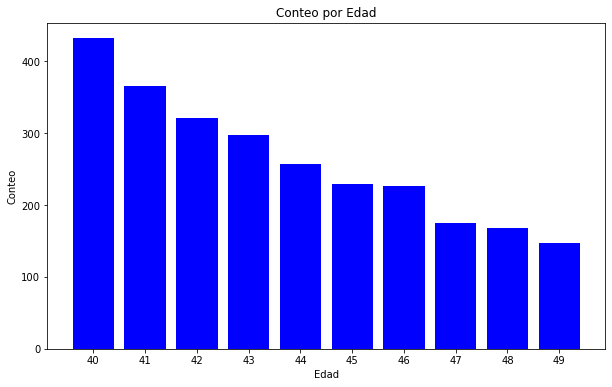

In [61]:
# Pruebo hacer un gráfico para ver como me muestra la info ya más resumida
edad = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
conteo = [432, 366, 321, 297, 257, 229, 226, 175, 168, 147]

plt.figure(figsize=(10, 6)) 
plt.bar(edad, conteo, color='blue')  
plt.xlabel('Edad')  
plt.ylabel('Conteo')  
plt.title('Conteo por Edad')  
plt.xticks(edad)  

plt.show()

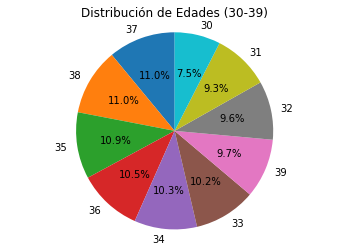

In [8]:
# Filtro por los de 30s para contar la cantidad que se repite de cada edad pero siempre con los de 30
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 30) & (df_Churn_Modelling_archivo['Age'] <= 39)]

# Contar las ocurrencias de cada categoría
age_counts = Age_df_30['Age'].value_counts()

# Crear el gráfico de torta con Matplotlib
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Hace que el gráfico sea un círculo
plt.title('Distribución de Edades (30-39)')
plt.show()

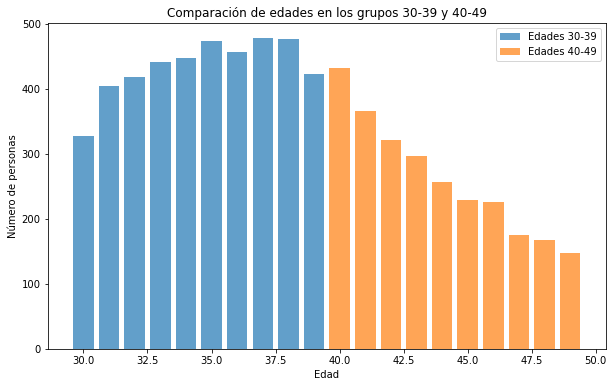

In [9]:
# Filtro por los de 30s y los de 40s  para contar y comparar 

age_counts_30 = Age_df_30['Age'].value_counts().sort_index()
age_counts_40 = Age_df_40['Age'].value_counts().sort_index()

# Crear un gráfico de barras para comparar las edades en ambos grupos
plt.figure(figsize=(10, 6))
plt.bar(age_counts_30.index, age_counts_30.values, label='Edades 30-39', alpha=0.7)
plt.bar(age_counts_40.index, age_counts_40.values, label='Edades 40-49', alpha=0.7)


plt.xlabel('Edad')
plt.ylabel('Número de personas')
plt.title('Comparación de edades en los grupos 30-39 y 40-49')
plt.legend()


plt.show()

In [ ]:
#concluyo que a medida que aumenta la edad bajan las cantidad personas

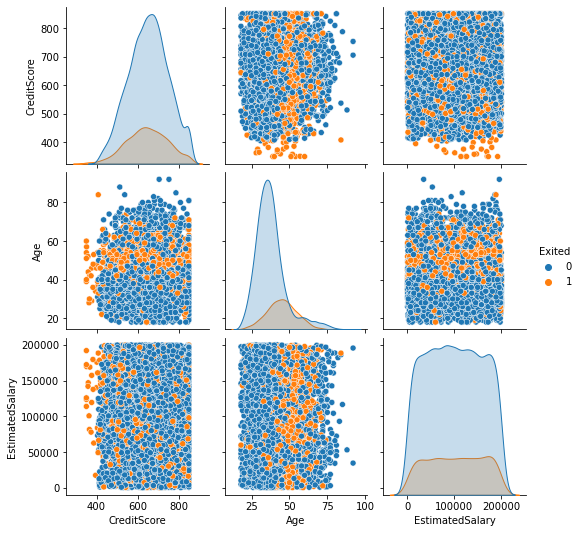

In [15]:
#Uso seaborn para mostrar lo que consiré más importante  buscando relaciones, esto es Credit Score, Edad etc
importantes = df_Churn_Modelling_archivo[['CreditScore','Age','EstimatedSalary','Exited']]

sns.pairplot(importantes , hue = 'Exited')

In [ ]:
#Veo como antes como baja el credit escore a medida que aumenta la edad

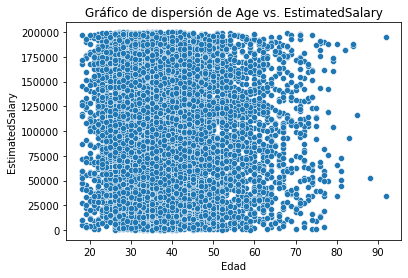

In [13]:
#Sigo comparando la relación Edad vs Salary probando con sns(seaborn)

edad = df_Churn_Modelling_archivo['Age']
salario_estimado = df_Churn_Modelling_archivo['EstimatedSalary']


sns.scatterplot(x=edad, y=salario_estimado)
plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')
plt.xlabel('Edad')
plt.ylabel('EstimatedSalary')

plt.show()

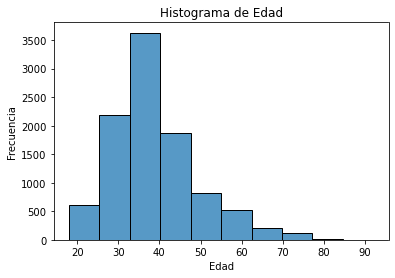

In [16]:
#Me interesa seguir probando sns ahora edad pero con un Histrograma buscando que me traiga la misma concentración de edades
#que en los gráficos anteriores
edad = df_Churn_Modelling_archivo['Age']

sns.histplot(edad, bins=10)
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


plt.show()

In [10]:
#Acá vamos a ver ahora que cantidades tenemos de hombres y mujeres
df_Churn_Modelling_archivo.describe(include=['O']) 

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
#Se observa que es mayor la cantidad de hombres, pero no sabemos en que cantidad

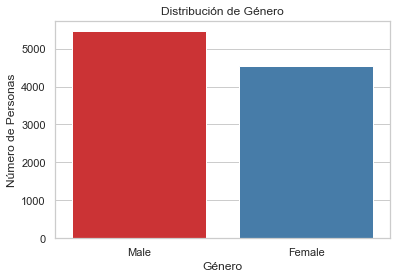

In [77]:
#Profundizo el análisis de los géneros. Es decir  contar en este caso los M y F,

gender_counts = df_Churn_Modelling_archivo['Gender'].value_counts()

sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set1")

plt.xlabel('Género')
plt.ylabel('Número de Personas')
plt.title('Distribución de Género')

plt.show()


In [ ]:
# observo que la distribución es casi 50/50.

#Seguiré analizando porque me interesa saber los EstimatedSalary distribuidos por Gender....

In [19]:
df_Churn_Modelling_archivo.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


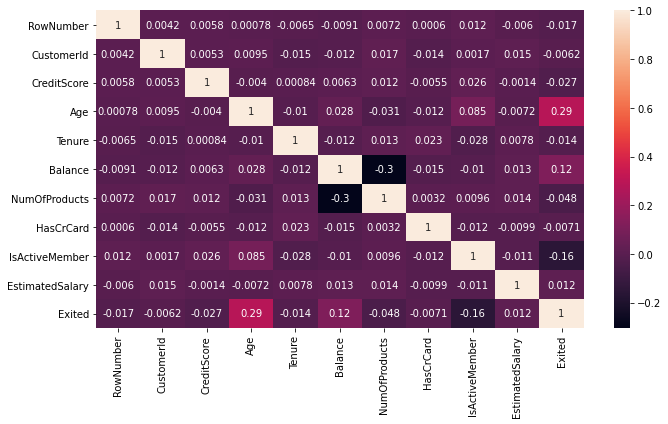

In [18]:
#Buscando correlación entre variables

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df_Churn_Modelling_archivo.corr(), 
            annot=True, 
            ax=ax)

plt.tight_layout()

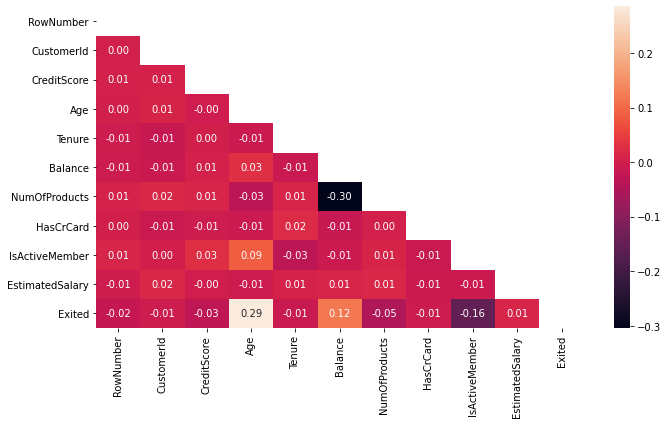

In [21]:
#se limpia el gráfico----veo que la edad no tiene correlación sino está relacionado con la cantidad de productos que tenga en el banco
fig, ax = plt.subplots(figsize=(10,6))

mask = np.triu(np.ones_like(df_Churn_Modelling_archivo.corr(),dtype = bool))
sns.heatmap(df_Churn_Modelling_archivo.corr(), mask = mask, fmt = ".2f",
            annot=True, 
            ax=ax)

plt.tight_layout()

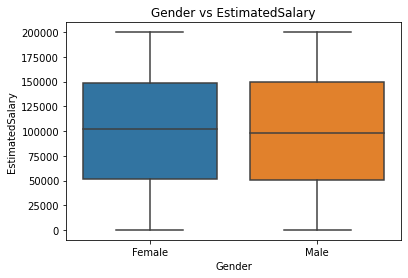

In [28]:

#Siguiendo con el análisis de EstimatedSalary distribuidos por Gender, veo que sigue siendo 50 y 50.
sns.boxplot(x='Gender', y = 'EstimatedSalary', data = df_Churn_Modelling_archivo) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Gender vs EstimatedSalary");

In [22]:
#Esto me sirve para tener presente los nombres de las colummnas para continuar con el análisis
df_Churn_Modelling_archivo.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

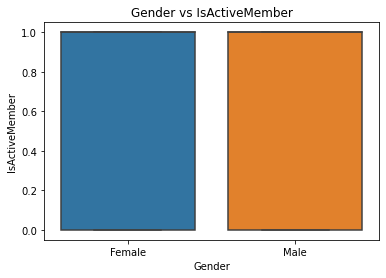

In [24]:
# Quiero saber sexos de los clientes activos
#Por la relación anterior, tenía que ser 50 y 50.
sns.boxplot(x='Gender', y = 'IsActiveMember', data = df_Churn_Modelling_archivo) 
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Gender vs IsActiveMember");

In [25]:
#Ahora pienso que es probable que la edad pueda que no sea un factor determinante. Para ello me interesa saber la actividad de los clientes:
#Cuento clientes activos vs inactivos, posiblemente por acá pueda obtener alguna respuesta, para saber quiénes abandonan o no el banco
df_Churn_Modelling_archivo['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [6]:
#Cuento clientes que tienen Credit Card, posiblemente por acá puede estar la respuesta, para saber quiénes abandonan o no el banco
df_Churn_Modelling_archivo['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [7]:
#Ahora voy a contar los clientes que se fueron, entiendo que serían de la columna Exited = 1, y los que siguen = 0

#Cuento clientes que se fueron vs los que siguen , posiblemente por acá pueda  obtener más respuestas a las hipótesis , para saber quiénes abandonan o no el banco
df_Churn_Modelling_archivo['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [32]:
#Volviendo al tema edad quiero probar con un modelo para predecir el EstimatedSalary segun la edad. EstimatedSalary variable dependiente (Y) y Age variable independiente(X)
#se puede ver que el Pv es mayor a 0,05 por lo cual vamos a descartar la variable edad.
#model1 = 'EstimatedSalary~Age'

#La función ols() se utiliza para especificar el modelo de regresión lineal.
lm1 = sm.ols(formula = model1, data = df_Churn_Modelling_archivo).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        EstimatedSalary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5185
Date:                Tue, 24 Oct 2023   Prob (F-statistic):              0.472
Time:                        00:45:32   Log-Likelihood:            -1.2379e+05
No. Observations:               10000   AIC:                         2.476e+05
Df Residuals:                    9998   BIC:                         2.476e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.016e+05   2210.581     45.973      0.0

In [33]:
#Hago un modelo para predecir el EstimatedSalary y el CreditScore. EstimatedSalary variable dependiente (Y) y CreditScore independiente(X)
#se puede ver que el Pv es mayor a 0,05 por lo cual vamos a descartar la variable CreditScore.
model2 = 'EstimatedSalary~CreditScore'

#La función ols() se utiliza para especificar el modelo de regresión lineal.
lm2 = sm.ols(formula = model2, data = df_Churn_Modelling_archivo).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        EstimatedSalary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01916
Date:                Tue, 24 Oct 2023   Prob (F-statistic):              0.890
Time:                        00:56:17   Log-Likelihood:            -1.2379e+05
No. Observations:               10000   AIC:                         2.476e+05
Df Residuals:                    9998   BIC:                         2.476e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.006e+05   3913.640     25.712      

In [27]:
#Pruebo con otras variables para el modelo con el IsActiveMember segun El salario estimado, la edad y el número de productos. IsActiveMember variable dependiente (Y) y Age variable independiente(X), etc

#La función ols() se utiliza para especificar el modelo de regresión lineal.
lm3 = sm.ols(formula = model3, data = df_Churn_Modelling_archivo).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         IsActiveMember   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     25.44
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.19e-16
Time:                        20:23:28   Log-Likelihood:                -7215.3
No. Observations:               10000   AIC:                         1.444e+04
Df Residuals:                    9996   BIC:                         1.447e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3493      0.025     

In [ ]:
#finalizo acá  la entrega, quedando por ver varios puntos...

In [4]:
df_Churn_Modelling_archivo['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64